In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import statsmodels.api as sm
%matplotlib inline

### Research Questions: 
- Which countries increased and decreased in level of happiness before and during COVID-19?

- Are the higher-ranked or lower-ranked GDP countries affected more from COVID-19?

- Is there a correlation between the two results from the previous questions?

In [2]:
df_clean = (pd.read_csv('/users/annabelle/School/2021/Summer2/data301/group25-project/project-group25-project/data/raw/world-happiness-report-2021.csv')
       .rename(columns = {'Ladder score':"Happiness score"})
       .assign(year='2021')
       .drop(['Logged GDP per capita', 
                              'Social support',
                              'Healthy life expectancy',
                              'Freedom to make life choices',
                              'Generosity',
                              'Perceptions of corruption',
                              'Ladder score in Dystopia',
                              'upperwhisker',
                              'lowerwhisker',
                              'Standard error of ladder score',
                              'Regional indicator',
                              'Dystopia + residual'],axis='columns')
       .rename(columns = {'Standard error of ladder score':"Standard error of happiness score", 
                          'Explained by: Log GDP per capita':"Log GDP per capita", 
                          'Explained by: Social support':"Social support", 
                          'Explained by: Healthy life expectancy':"Healthy life expectancy",
                          'Explained by: Freedom to make life choices':"Freedom to make life choices",
                          'Explained by: Generosity':"Generosity",
                          'Explained by: Perceptions of corruption':"Perceptions of corruption"}))
        
df_clean.head()

,Country name,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,Finland,7.842,1.446,1.106,0.741,0.691,0.124,0.481,2021
1,Denmark,7.620,1.502,1.108,0.763,0.686,0.208,0.485,2021
2,Switzerland,7.571,1.566,1.079,0.816,0.653,0.204,0.413,2021
3,Iceland,7.554,1.482,1.172,0.772,0.698,0.293,0.170,2021
4,Netherlands,7.464,1.501,1.079,0.753,0.647,0.302,0.384,2021


In [15]:
df2 = (pd.read_csv('/users/annabelle/School/2021/Summer2/data301/group25-project/project-group25-project/data/raw/world-happiness-report.csv')
       .rename(columns = {'Life Ladder':"Happiness score",'Healthy life expectancy at birth':"Healthy life expectancy"})
       .drop(['Positive affect','Negative affect'],axis='columns')
       .loc[lambda x: x['year']>2017]
      )

In [16]:
df2.dropna(subset=['Log GDP per capita'], inplace=True)

In [17]:
df2.fillna(method ='pad')

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
10,Afghanistan,2018,2.694,7.692,0.508,52.6,0.374,-0.094,0.928
11,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924
22,Albania,2018,5.004,9.518,0.684,68.7,0.824,0.009,0.899
23,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914
24,Albania,2020,5.365,9.497,0.710,69.3,0.754,0.007,0.891
...,...,...,...,...,...,...,...,...,...
1932,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832
1933,Zambia,2020,4.838,8.117,0.767,56.3,0.750,0.056,0.810
1946,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844
1947,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831


In [18]:
df2 = df2.reset_index(drop=True)
df2.head()

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2018,2.694,7.692,0.508,52.6,0.374,-0.094,0.928
1,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924
2,Albania,2018,5.004,9.518,0.684,68.7,0.824,0.009,0.899
3,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914
4,Albania,2020,5.365,9.497,0.710,69.3,0.754,0.007,0.891


#### According to this table, the countries with the highest happiness score in 2021 are Finland, Denmark and Switzerland. While the countries with the lowest happiness score are Rwanda, Zimbabwe and Afghanistan.

In [31]:
df_clean['Happiness score Mean'] = df_clean["Happiness score"].mean()
df_clean_HSM = df_clean.drop(columns = ['Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Log GDP per capita'])
df_clean_HSM.mean()
df_clean_HSM.sort_values(by = ['Happiness score Mean'], ascending = False)
df_clean_HSM['Happiness score diff'] = df_clean_HSM['Happiness score'] - df_clean_HSM['Happiness score Mean']
df_clean_HSM

,Country name,Happiness score,year,Happiness score Mean,Log GDP per capita Mean,Happiness score diff
0,Finland,7.842,2021,5.532839,0.977161,2.309161
1,Denmark,7.620,2021,5.532839,0.977161,2.087161
2,Switzerland,7.571,2021,5.532839,0.977161,2.038161
3,Iceland,7.554,2021,5.532839,0.977161,2.021161
4,Netherlands,7.464,2021,5.532839,0.977161,1.931161
...,...,...,...,...,...,...
144,Lesotho,3.512,2021,5.532839,0.977161,-2.020839
145,Botswana,3.467,2021,5.532839,0.977161,-2.065839
146,Rwanda,3.415,2021,5.532839,0.977161,-2.117839
147,Zimbabwe,3.145,2021,5.532839,0.977161,-2.387839


#### According to this table, the country with the highest happiness score between years 2018 to 2020 is Finland. Finland had the highest happiness score in 2020, 2018 and 2019. While the countries with the lowest happiness score are Zimbabwe and Afghanistan.

In [32]:
df2['Happiness score Mean'] = df2["Happiness score"].mean()
df2_HSM = df2.drop(columns = ['Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Log GDP per capita'])
df2_HSM.mean()
df2_HSM.sort_values(by = ['Happiness score Mean'], ascending = False)
df2_HSM['Happiness score diff'] = df2_HSM['Happiness score'] - df2_HSM['Happiness score Mean']
df2_HSM=df2_HSM.sort_values(by = ['Happiness score diff'], ascending = False)
df2_HSM = df2_HSM.reset_index()
df2_HSM.drop(columns = ['index'], inplace=True)
df2_HSM

,Country name,year,Happiness score,Happiness score Mean,Log GDP per capita Mean,Happiness score diff
0,Finland,2020,7.889,5.629959,9.517304,2.259041
1,Finland,2018,7.858,5.629959,9.517304,2.228041
2,Finland,2019,7.780,5.629959,9.517304,2.150041
3,Switzerland,2019,7.694,5.629959,9.517304,2.064041
4,Denmark,2019,7.693,5.629959,9.517304,2.063041
...,...,...,...,...,...,...
357,India,2019,3.249,5.629959,9.517304,-2.380959
358,Zimbabwe,2020,3.160,5.629959,9.517304,-2.469959
359,Zimbabwe,2019,2.694,5.629959,9.517304,-2.935959
360,Afghanistan,2018,2.694,5.629959,9.517304,-2.935959


### Happiness scores, mean and difference for 2018 to 2021

In [ ]:
result =result.sort_values(by = ['Happiness score diff'], ascending = False)

In [35]:
frames = [df_clean_HSM, df2_HSM]
  
result = pd.concat(frames)
result =result.sort_values(by = ['Happiness score diff'], ascending = False)
result = result.reset_index()
result.drop(columns = ['index'], inplace=True)
result

,Country name,Happiness score,year,Happiness score Mean,Log GDP per capita Mean,Happiness score diff
0,Finland,7.842,2021,5.532839,0.977161,2.309161
1,Finland,7.889,2020,5.629959,9.517304,2.259041
2,Finland,7.858,2018,5.629959,9.517304,2.228041
3,Finland,7.780,2019,5.629959,9.517304,2.150041
4,Denmark,7.620,2021,5.532839,0.977161,2.087161
...,...,...,...,...,...,...
506,Zimbabwe,3.160,2020,5.629959,9.517304,-2.469959
507,Afghanistan,2.694,2018,5.629959,9.517304,-2.935959
508,Zimbabwe,2.694,2019,5.629959,9.517304,-2.935959
509,Afghanistan,2.523,2021,5.532839,0.977161,-3.009839


### Log GDP per capita, mean and difference for 2021

#### According to this table, the countries with the highest log GDP per capita in 2021 are Finland, Denmark and Switzerland. The lowest log GDP per capita in 2021 are Rwanda, Zimbabwe and Afghanistan

In [22]:
df_clean['Log GDP per capita Mean'] = df_clean["Log GDP per capita"].mean()
df_LGPC_M = df_clean.drop(columns = ['Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Happiness score','Happiness score Mean'])
df_LGPC_M.mean()
df_LGPC_M.sort_values(by = ['Log GDP per capita Mean'], ascending = False)
df_LGPC_M['Log GDP per capita diff'] = df_LGPC_M['Log GDP per capita'] - df_LGPC_M['Log GDP per capita Mean']
df_LGPC_M

,Country name,Log GDP per capita,year,Log GDP per capita Mean,Log GDP per capita diff
0,Finland,1.446,2021,0.977161,0.468839
1,Denmark,1.502,2021,0.977161,0.524839
2,Switzerland,1.566,2021,0.977161,0.588839
3,Iceland,1.482,2021,0.977161,0.504839
4,Netherlands,1.501,2021,0.977161,0.523839
...,...,...,...,...,...
144,Lesotho,0.451,2021,0.977161,-0.526161
145,Botswana,1.099,2021,0.977161,0.121839
146,Rwanda,0.364,2021,0.977161,-0.613161
147,Zimbabwe,0.457,2021,0.977161,-0.520161


### Log GDP per capita, mean and difference for 2018 to 2020

#### According to this table, the countries with the highest Log GDP per capita between 2018 and 2020 are Luxembourg and Singapore. The lowest are Malawi and Burundi.

In [36]:
df2['Log GDP per capita Mean'] = df2["Log GDP per capita"].mean()
df2_LGPC_M = df2.drop(columns = ['Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Happiness score','Happiness score Mean'])
df2_LGPC_M.mean()
df2_LGPC_M.sort_values(by = ['Log GDP per capita Mean'], ascending = False)
df2_LGPC_M['Log GDP per capita diff'] = df2_LGPC_M['Log GDP per capita'] - df2_LGPC_M['Log GDP per capita Mean']
df2_LGPC_M=df2_LGPC_M.sort_values(by = ['Log GDP per capita diff'], ascending = False)
df2_LGPC_M = df2_LGPC_M.reset_index()
df2_LGPC_M.drop(columns = ['index'], inplace=True)
df2_LGPC_M

,Country name,year,Log GDP per capita,Log GDP per capita Mean,Log GDP per capita diff
0,Luxembourg,2019,11.648,9.517304,2.130696
1,Luxembourg,2018,11.645,9.517304,2.127696
2,Singapore,2018,11.490,9.517304,1.972696
3,Singapore,2019,11.486,9.517304,1.968696
4,Ireland,2019,11.371,9.517304,1.853696
...,...,...,...,...,...
357,Niger,2019,7.106,9.517304,-2.411304
358,Niger,2018,7.087,9.517304,-2.430304
359,Malawi,2019,6.966,9.517304,-2.551304
360,Malawi,2018,6.949,9.517304,-2.568304


#### Overall, 2021 is one of the lowest bars in this barplot. This is most likely due to COVID-19 and its restrictions.

<AxesSubplot:xlabel='year', ylabel='Happiness score'>

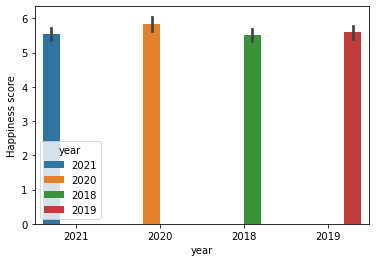

In [24]:
sns.barplot(x='year',y='Happiness score', data=result, hue='year')

<AxesSubplot:xlabel='year', ylabel='Log GDP per capita'>

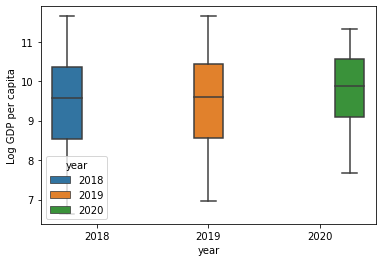

In [30]:
sns.boxplot(x='year',y='Log GDP per capita', data=df2_LGPC_M, hue='year')

<AxesSubplot:xlabel='year', ylabel='Log GDP per capita'>

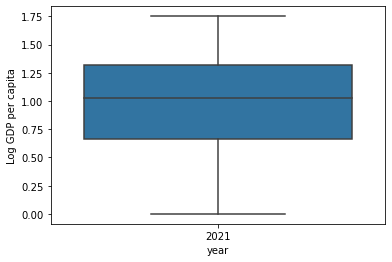

In [29]:
sns.boxplot(x='year',y='Log GDP per capita', data=df_LGPC_M)

#### Previous Notes
According to this table, the country with the highest happiness score between years 2018 to 2020 is Finland. Finland had the highest happiness score in 2020, 2018 and 2019. While the countries with the lowest happiness score are Zimbabwe and Afghanistan.

According to this table, the countries with the highest happiness score in 2021 are Finland, Denmark and Switzerland. While the countries with the lowest happiness score are Rwanda, Zimbabwe and Afghanistan.

According to this table, the countries with the highest Log GDP per capita between 2018 and 2020 are Luxembourg and Singapore. The lowest are Malawi and Burundi.

According to this table, the countries with the highest log GDP per capita in 2021 are Finland, Denmark and Switzerland. The lowest log GDP per capita in 2021 are Rwanda, Zimbabwe and Afghanistan

According to this table, the countries with the highest Log GDP per capita between 2018 and 2020 are Luxembourg and Singapore. The lowest are Malawi and Burundi.

#### Analysis

My notes show that there wasn't a big difference for Finland before and during COVID-19 in the context of happiness scores. They continue to be the highest scored country, even during a pandemic. In relation to log GDP per capita, Finland was not in the top three of the highest log GDP per capita. However, in 2021, they managed to be in first for the highest log GDP per capita.

Zimbabwe and Afghanistan were rated the lowest in terms of happiness score for 2018 to 2021. There is no difference before and during the pandemic. However, there was a difference in the log GDP per capita rankings. Between 2018 to 2020, they were not the lowest ranked. This changed in 2021, as they were both ranked the lowest log GDP per capita.